<a href="https://colab.research.google.com/github/surayajohari/STQD6014-Data-Science/blob/main/suraya_Week15_DataAnalysis_20240128_WC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Week 15: Data Analysis**

Please refer to the textbook: "[Python for Data Analysis](https://wesmckinney.com/book/)" by Wes McKinney for details of this topic on Chapter 13

In [39]:
# start by importing NumPy and pandas
import numpy as np
import pandas as pd
import seaborn as sns

## **15.1 Bitly Data from 1.USA.gov**
In 2011, the URL shortening service Bitly partnered with the US government website USA.gov to provide a feed of anonymous data gathered from users who shorten links ending with .gov or .mil.

Data is from -> https://www.ssa.gov/oact/babynames/limits.html



In [4]:
# Access the raw data here: https://bit.ly/3HbPOjE
# Save the data in a file name as example.txt
# Upload the example.txt file to your specific folder
from google.colab import files
files.upload()

Saving example.txt to example.txt


{'example.txt': b'{ "a": "Mozilla\\/5.0 (Windows NT 6.1; WOW64) AppleWebKit\\/535.11 (KHTML, like Gecko) Chrome\\/17.0.963.78 Safari\\/535.11", "c": "US", "nk": 1, "tz": "America\\/New_York", "gr": "MA", "g": "A6qOVH", "h": "wfLQtf", "l": "orofrog", "al": "en-US,en;q=0.8", "hh": "1.usa.gov", "r": "http:\\/\\/www.facebook.com\\/l\\/7AQEFzjSi\\/1.usa.gov\\/wfLQtf", "u": "http:\\/\\/www.ncbi.nlm.nih.gov\\/pubmed\\/22415991", "t": 1331923247, "hc": 1331822918, "cy": "Danvers", "ll": [ 42.576698, -70.954903 ] }\r\n{ "a": "GoogleMaps\\/RochesterNY", "c": "US", "nk": 0, "tz": "America\\/Denver", "gr": "UT", "g": "mwszkS", "h": "mwszkS", "l": "bitly", "hh": "j.mp", "r": "http:\\/\\/www.AwareMap.com\\/", "u": "http:\\/\\/www.monroecounty.gov\\/etc\\/911\\/rss.php", "t": 1331923249, "hc": 1308262393, "cy": "Provo", "ll": [ 40.218102, -111.613297 ] }\r\n{ "a": "Mozilla\\/4.0 (compatible; MSIE 8.0; Windows NT 6.1; WOW64; Trident\\/4.0; SLCC2; .NET CLR 2.0.50727; .NET CLR 3.5.30729; .NET CLR 3.0.30

In [9]:
# Move to your own folder
!mv /content/example.txt /content/drive/MyDrive/STQD6014/example.txt

mv: cannot stat '/content/example.txt': No such file or directory


In [7]:
# Create a object to save the URL string
# This file is in JSON format
path = "/content/drive/MyDrive/STQD6014/example.txt"

In [13]:
# important final exam
# using json module to load the data
# [json.loads(line) for line in f] -> iterates over each line in the file (f);
# applies json.loads() to convert each line from JSON format to a Python object;
# collects these objects into a list named records

import json
with open(path) as f:
    records = [json.loads(line) for line in f]


In [14]:
# object records is now a list of Python dictionary
# access the element in the records
records[0]

{'a': 'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.78 Safari/535.11',
 'c': 'US',
 'nk': 1,
 'tz': 'America/New_York',
 'gr': 'MA',
 'g': 'A6qOVH',
 'h': 'wfLQtf',
 'l': 'orofrog',
 'al': 'en-US,en;q=0.8',
 'hh': '1.usa.gov',
 'r': 'http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/wfLQtf',
 'u': 'http://www.ncbi.nlm.nih.gov/pubmed/22415991',
 't': 1331923247,
 'hc': 1331822918,
 'cy': 'Danvers',
 'll': [42.576698, -70.954903]}

#### **Counting Time Zones in Pure Python**
finding the time zones that **occur most often** in the dataset (***the tz field***)

In [28]:
# Extract a list of time zones
time_zones = [rec['tz']  for rec in records if 'tz' in rec]
time_zones[:15]

['America/New_York',
 'America/Denver',
 'America/New_York',
 'America/Sao_Paulo',
 'America/New_York',
 'America/New_York',
 'Europe/Warsaw',
 '',
 '',
 '',
 'America/Los_Angeles',
 'America/New_York',
 'America/New_York',
 'America/New_York',
 'Asia/Hong_Kong']

In [29]:
# Produce a count by time zone
# using dictionary to store counts
# 'counts[x] += 1' -> If an element is already present in the dictionary, it increments its count by one
def get_counts(sequence):
    counts = {}
    for x in sequence:
        if x in counts:
            counts[x] += 1
        else:
            counts[x] = 1
    return counts

In [30]:
# get the time zone count data
cts = get_counts(time_zones)

In [31]:
# Display top few rows of counts dictionary
for key, value in list(cts.items())[:10]:
    print (f'{key}:{value}')

America/New_York:1251
America/Denver:191
America/Sao_Paulo:33
Europe/Warsaw:16
:521
America/Los_Angeles:382
Asia/Hong_Kong:10
Europe/Rome:27
Africa/Ceuta:2
Europe/Madrid:35


In [32]:
# Accessing single element
cts['Asia/Kuala_Lumpur']

3

In [33]:
# Numbers of time zone in records
len(time_zones)

3440

In [34]:
# Define a top_counts() function -> to get top 10 time zones and their counts
# Output as a tuple
def top_counts(count_dict, n=10):
    value_key_pairs = [(count, tz) for tz, count in count_dict.items()]
    value_key_pairs.sort()
    return value_key_pairs[-n:]

In [35]:
# top ten time zones
# using own function -> cts
top_counts(cts)

[(33, 'America/Sao_Paulo'),
 (35, 'Europe/Madrid'),
 (36, 'Pacific/Honolulu'),
 (37, 'Asia/Tokyo'),
 (74, 'Europe/London'),
 (191, 'America/Denver'),
 (382, 'America/Los_Angeles'),
 (400, 'America/Chicago'),
 (521, ''),
 (1251, 'America/New_York')]

In [37]:
# Another using Counter function
# using package from phython
from collections import Counter
counts = Counter(time_zones)
counts.most_common(10)


[('America/New_York', 1251),
 ('', 521),
 ('America/Chicago', 400),
 ('America/Los_Angeles', 382),
 ('America/Denver', 191),
 ('Europe/London', 74),
 ('Asia/Tokyo', 37),
 ('Pacific/Honolulu', 36),
 ('Europe/Madrid', 35),
 ('America/Sao_Paulo', 33)]

#### **Counting Time Zones with pandas**

In [40]:
# Transform the records object to a pandas DataFrame
# We have tz element: (i) missing data, (ii) NaN
frame = pd.DataFrame(records)
frame.head(15)

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
5,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,axNK8c,axNK8c,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273673e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN
6,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...,PL,0.0,Europe/Warsaw,77,wcndER,zkpJBR,bnjacobs,"pl-PL,pl;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://plus.url.google.com/url?sa=z&n=13319232...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,Luban,"[51.116699, 15.2833]",NaN,NaN
7,Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...,None,0.0,,NaN,wcndER,zkpJBR,bnjacobs,"bg,en-us;q=0.7,en;q=0.3",1.usa.gov,http://www.facebook.com/,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
8,Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...,None,0.0,,NaN,wcndER,zkpJBR,bnjacobs,"en-US, en",1.usa.gov,http://www.facebook.com/l.php?u=http%3A%2F%2F1...,http://www.nasa.gov/mission_pages/nustar/main/...,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN
9,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,None,0.0,,NaN,zCaLwp,zUtuOu,alelex88,"pt-BR,pt;q=0.8,en-US;q=0.6,en;q=0.4",1.usa.gov,http://t.co/o1Pd0WeV,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,NaN,NaN,NaN,NaN


In [41]:
# basic information about the DataFrame
frame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3560 entries, 0 to 3559
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   a            3440 non-null   object 
 1   c            2919 non-null   object 
 2   nk           3440 non-null   float64
 3   tz           3440 non-null   object 
 4   gr           2919 non-null   object 
 5   g            3440 non-null   object 
 6   h            3440 non-null   object 
 7   l            3440 non-null   object 
 8   al           3094 non-null   object 
 9   hh           3440 non-null   object 
 10  r            3440 non-null   object 
 11  u            3440 non-null   object 
 12  t            3440 non-null   float64
 13  hc           3440 non-null   float64
 14  cy           2919 non-null   object 
 15  ll           2919 non-null   object 
 16  _heartbeat_  120 non-null    float64
 17  kw           93 non-null     object 
dtypes: float64(4), object(14)
memory usage: 500.8+ K

In [42]:
# Count tz information
tz_cts = frame['tz'].value_counts()
tz_cts.head(10)

America/New_York       1251
                        521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
America/Sao_Paulo        33
Name: tz, dtype: int64

In [43]:
# zooming in to time zone variable
frame['tz'].head(15)

0        America/New_York
1          America/Denver
2        America/New_York
3       America/Sao_Paulo
4        America/New_York
5        America/New_York
6           Europe/Warsaw
7                        
8                        
9                        
10    America/Los_Angeles
11       America/New_York
12       America/New_York
13                    NaN
14       America/New_York
Name: tz, dtype: object

In [45]:
# filling in NaN with 'NA'
# filling in missing data with 'Unknown Time Zone'
clean_tz = frame['tz'].fillna('NA')
clean_tz[clean_tz ==''] = 'Unknown Time Zone'
tz_cts = clean_tz.value_counts()
tz_cts.head(10)


America/New_York       1251
Unknown Time Zone       521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
NA                      120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

In [46]:
# Another way: chaining the methods
tz_cts = frame['tz'] \
    .fillna("NA") \
    .replace('', 'Unknown Time Zone') \
    .value_counts()

tz_cts.head(10)

America/New_York       1251
Unknown Time Zone       521
America/Chicago         400
America/Los_Angeles     382
America/Denver          191
NA                      120
Europe/London            74
Asia/Tokyo               37
Pacific/Honolulu         36
Europe/Madrid            35
Name: tz, dtype: int64

Text(0.5, 1.0, 'Top five time zones in the Bitly 1.usa.gov sample data')

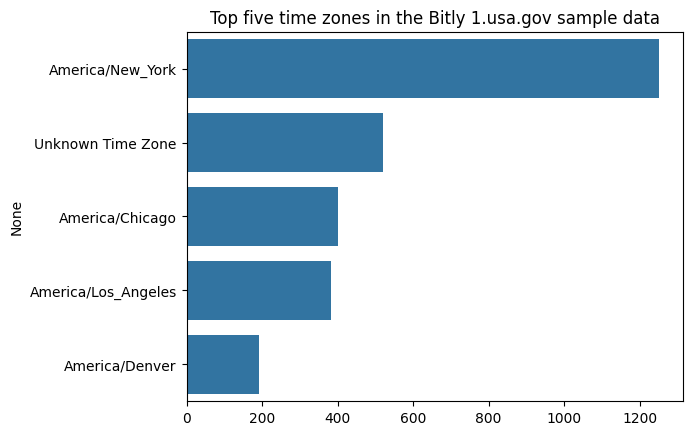

In [48]:
# from matplotlib.pyplot import title
# make a horizontal bar plot
# default for head is 5 rows if no argument is provided
subset = tz_cts.head(5)
ax = sns.barplot(y=subset.index, x=subset.to_numpy())
ax.set_title('Top five time zones in the Bitly 1.usa.gov sample data')

#### **Working on other field in the Bitly dataset**


In [51]:
# the "a" field contains information about the browser, device, or application
frame['a'].head(10)

0    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1                               GoogleMaps/RochesterNY
2    Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3    Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
5    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
6    Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
7    Mozilla/5.0 (Windows NT 6.1; rv:2.0.1) Gecko/2...
8    Opera/9.80 (X11; Linux zbov; U; en) Presto/2.1...
9    Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
Name: a, dtype: object

In [50]:
# acessing single element
frame['a'][4]

'Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKit/535.11 (KHTML, like Gecko) Chrome/17.0.963.79 Safari/535.11'

In [52]:
# takes the first 11 characters of a long string
frame['a'][4][:11]

'Mozilla/5.0'

In [54]:
# If no delimiter is specified, split() function splits the string based on whitespace by default
pd.Series([x.split() for x in frame['a'].dropna()])

0       [Mozilla/5.0, (Windows, NT, 6.1;, WOW64), Appl...
1                                [GoogleMaps/RochesterNY]
2       [Mozilla/4.0, (compatible;, MSIE, 8.0;, Window...
3       [Mozilla/5.0, (Macintosh;, Intel, Mac, OS, X, ...
4       [Mozilla/5.0, (Windows, NT, 6.1;, WOW64), Appl...
                              ...                        
3435    [Mozilla/4.0, (compatible;, MSIE, 9.0;, Window...
3436    [Mozilla/5.0, (Windows, NT, 5.1), AppleWebKit/...
3437                             [GoogleMaps/RochesterNY]
3438                                     [GoogleProducer]
3439    [Mozilla/4.0, (compatible;, MSIE, 8.0;, Window...
Length: 3440, dtype: object

In [56]:
# Gather the browser information
res = pd.Series([x.split()[0] for x in frame['a'].dropna()])
res.head(8)

0               Mozilla/5.0
1    GoogleMaps/RochesterNY
2               Mozilla/4.0
3               Mozilla/5.0
4               Mozilla/5.0
5               Mozilla/5.0
6               Mozilla/5.0
7               Mozilla/5.0
dtype: object

In [57]:
# make the count summary
res.value_counts().head()

Mozilla/5.0               2594
Mozilla/4.0                601
GoogleMaps/RochesterNY     121
Opera/9.80                  34
TEST_INTERNET_AGENT         24
dtype: int64

## **Decompose the top time zones into Windows and non-Windows users.**

In [58]:
# first filter out missing data
cframe = frame[frame['a'].notna()].copy()
cframe[['a']]

,a
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
1,GoogleMaps/RochesterNY
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...
...,...
3555,Mozilla/4.0 (compatible; MSIE 9.0; Windows NT ...
3556,Mozilla/5.0 (Windows NT 5.1) AppleWebKit/535.1...
3557,GoogleMaps/RochesterNY
3558,GoogleProducer


In [59]:
# Check whether each row is of Windows operation system
# adding as a new column
cframe['os']=np.where(cframe['a'].str.contains('Windows'),
                      'Windows', 'Not Windows')

# Display top few rows
cframe.head()

,a,c,nk,tz,gr,g,h,l,al,hh,r,u,t,hc,cy,ll,_heartbeat_,kw,os
0,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,1.0,America/New_York,MA,A6qOVH,wfLQtf,orofrog,"en-US,en;q=0.8",1.usa.gov,http://www.facebook.com/l/7AQEFzjSi/1.usa.gov/...,http://www.ncbi.nlm.nih.gov/pubmed/22415991,1.331923e+09,1.331823e+09,Danvers,"[42.576698, -70.954903]",NaN,NaN,Windows
1,GoogleMaps/RochesterNY,US,0.0,America/Denver,UT,mwszkS,mwszkS,bitly,NaN,j.mp,http://www.AwareMap.com/,http://www.monroecounty.gov/etc/911/rss.php,1.331923e+09,1.308262e+09,Provo,"[40.218102, -111.613297]",NaN,NaN,Not Windows
2,Mozilla/4.0 (compatible; MSIE 8.0; Windows NT ...,US,1.0,America/New_York,DC,xxr3Qb,xxr3Qb,bitly,en-US,1.usa.gov,http://t.co/03elZC4Q,http://boxer.senate.gov/en/press/releases/0316...,1.331923e+09,1.331920e+09,Washington,"[38.9007, -77.043098]",NaN,NaN,Windows
3,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_6_8)...,BR,0.0,America/Sao_Paulo,27,zCaLwp,zUtuOu,alelex88,pt-br,1.usa.gov,direct,http://apod.nasa.gov/apod/ap120312.html,1.331923e+09,1.331923e+09,Braz,"[-23.549999, -46.616699]",NaN,NaN,Not Windows
4,Mozilla/5.0 (Windows NT 6.1; WOW64) AppleWebKi...,US,0.0,America/New_York,MA,9b6kNl,9b6kNl,bitly,"en-US,en;q=0.8",bit.ly,http://www.shrewsbury-ma.gov/selco/,http://www.shrewsbury-ma.gov/egov/gallery/1341...,1.331923e+09,1.273672e+09,Shrewsbury,"[42.286499, -71.714699]",NaN,NaN,Windows


In [60]:
# groupby time zone and os column
# Create an intermediate by_tz_os object
by_tz_os = cframe.groupby(['tz', 'os'])

In [61]:
# Using size() function to get count data
# this is a long format table -> vertically arranged
by_tz_os.size()

tz                 os         
                   Not Windows    245
                   Windows        276
Africa/Cairo       Windows          3
Africa/Casablanca  Windows          1
Africa/Ceuta       Windows          2
                                 ... 
Europe/Warsaw      Windows         15
Europe/Zurich      Not Windows      4
Pacific/Auckland   Not Windows      3
                   Windows          8
Pacific/Honolulu   Windows         36
Length: 149, dtype: int64

In [63]:
# 1. reshape by_tz_os.size() into Not Windows and Windows columns -> wide format
# horizontally arranged
# 2. fillna = 0
# 3. put into variable called agg_counts
agg_counts = by_tz_os.size().unstack().fillna(0)
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [64]:
# Sum along the columns (axis = 1)
agg_counts.sum(axis=1)

tz
                       521.0
Africa/Cairo             3.0
Africa/Casablanca        1.0
Africa/Ceuta             2.0
Africa/Johannesburg      1.0
                       ...  
Europe/Volgograd         1.0
Europe/Warsaw           16.0
Europe/Zurich            4.0
Pacific/Auckland        11.0
Pacific/Honolulu        36.0
Length: 97, dtype: float64

In [65]:
# computing the row counts with agg_counts.sum("axis=1")
# call argsort() to obtain an index array that can be used to sort in ascending order
indexer = agg_counts.sum(axis=1).argsort()
indexer.values[-10:]

array([35, 78, 96, 59, 77, 15, 22, 12,  0, 29])

In [67]:
# use the indexer to select the rows
# slice off the last 10 rows (largest values)
count_subset = agg_counts.take(indexer.values[-10:])
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [68]:
# To get the total sum
count_subset_sum = count_subset.copy()
count_subset_sum['Jumlah'] = count_subset_sum.sum(axis=1)
count_subset_sum

os,Not Windows,Windows,Jumlah
tz,,,
America/Sao_Paulo,13.0,20.0,33.0
Europe/Madrid,16.0,19.0,35.0
Pacific/Honolulu,0.0,36.0,36.0
Asia/Tokyo,2.0,35.0,37.0
Europe/London,43.0,31.0,74.0
America/Denver,132.0,59.0,191.0
America/Los_Angeles,130.0,252.0,382.0
America/Chicago,115.0,285.0,400.0
,245.0,276.0,521.0


In [69]:
# Display agg_counts content
agg_counts

os,Not Windows,Windows
tz,,
,245.0,276.0
Africa/Cairo,0.0,3.0
Africa/Casablanca,0.0,1.0
Africa/Ceuta,0.0,2.0
Africa/Johannesburg,0.0,1.0
...,...,...
Europe/Volgograd,0.0,1.0
Europe/Warsaw,1.0,15.0
Europe/Zurich,4.0,0.0


In [70]:
# Using pandas way
# Get the top ten largest counts
agg_counts.sum(axis=1).nlargest(10)

tz
America/New_York       1251.0
                        521.0
America/Chicago         400.0
America/Los_Angeles     382.0
America/Denver          191.0
Europe/London            74.0
Asia/Tokyo               37.0
Pacific/Honolulu         36.0
Europe/Madrid            35.0
America/Sao_Paulo        33.0
dtype: float64

In [72]:
# Display count_subset content (top ten time zone)
# This is in stack format
count_subset

os,Not Windows,Windows
tz,,
America/Sao_Paulo,13.0,20.0
Europe/Madrid,16.0,19.0
Pacific/Honolulu,0.0,36.0
Asia/Tokyo,2.0,35.0
Europe/London,43.0,31.0
America/Denver,132.0,59.0
America/Los_Angeles,130.0,252.0
America/Chicago,115.0,285.0
,245.0,276.0


In [73]:
# Transform the data frame from wide to long format
# important for 4th question: -> reset_index() function
count_subset.stack()

tz                   os         
America/Sao_Paulo    Not Windows     13.0
                     Windows         20.0
Europe/Madrid        Not Windows     16.0
                     Windows         19.0
Pacific/Honolulu     Not Windows      0.0
                     Windows         36.0
Asia/Tokyo           Not Windows      2.0
                     Windows         35.0
Europe/London        Not Windows     43.0
                     Windows         31.0
America/Denver       Not Windows    132.0
                     Windows         59.0
America/Los_Angeles  Not Windows    130.0
                     Windows        252.0
America/Chicago      Not Windows    115.0
                     Windows        285.0
                     Not Windows    245.0
                     Windows        276.0
America/New_York     Not Windows    339.0
                     Windows        912.0
dtype: float64

In [76]:
# Using reset_index() function
# important for final exam
count_subset_stack = count_subset.stack()
count_subset_stack.name = 'Jumlah'
count_subset_stack = count_subset_stack.reset_index()
count_subset_stack.head()

,tz,os,Jumlah
0,America/Sao_Paulo,Not Windows,13.0
1,America/Sao_Paulo,Windows,20.0
2,Europe/Madrid,Not Windows,16.0
3,Europe/Madrid,Windows,19.0
4,Pacific/Honolulu,Not Windows,0.0


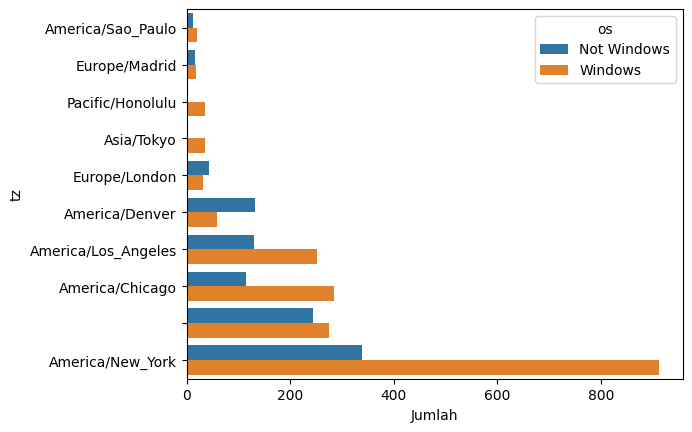

In [77]:
# plotted in a grouped bar plot
sns.barplot(x='Jumlah', y = 'tz', hue = 'os', data = count_subset_stack);

In [79]:
# Define a normalize function
def norm_total(group):
    group["normed_total"] = group["Jumlah"] / group["Jumlah"].sum()
    return group

# normalize the group percentages to sum = 1
res = count_subset_stack.groupby('tz', group_keys=False).apply(norm_total)
res.head()

,tz,os,Jumlah,normed_total
0,America/Sao_Paulo,Not Windows,13.0,0.393939
1,America/Sao_Paulo,Windows,20.0,0.606061
2,Europe/Madrid,Not Windows,16.0,0.457143
3,Europe/Madrid,Windows,19.0,0.542857
4,Pacific/Honolulu,Not Windows,0.0,0.000000


Text(0.5, 1.0, 'Normalized the group percentage to Sum = 1')

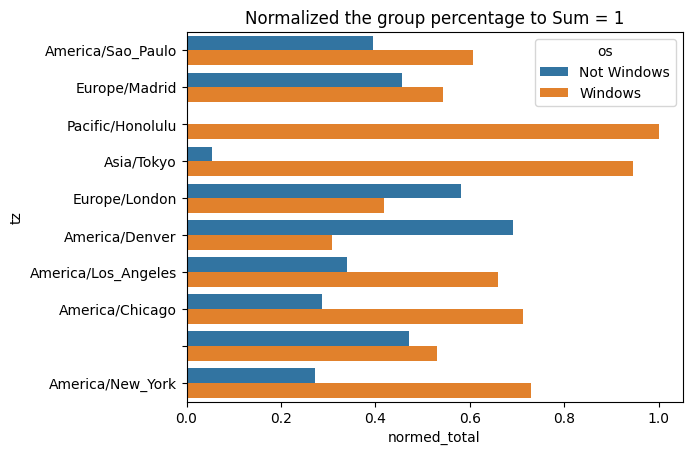

In [85]:
# Barplot
ax = sns.barplot(x='normed_total', y = 'tz', hue = 'os', data = res)
ax.set_title('Normalized the group percentage to Sum = 1')

# **15.2 US Baby Names 1880–2022**
The United States Social Security Administration (SSA) has made available data on the frequency of baby names from 1880 through 2022 (**access date**: **2024-01-16 11:51 +8:00**).

## **Access the Popular Baby Names data here: http://tinyurl.com/2de29wz8**
* download the zipped **<font color='red'>National Data**

In [86]:
# Upload the yob2022 files
from google.colab import files
files.upload()

Saving yob2022.txt to yob2022.txt


{'yob2022.txt': b'Olivia,F,16573\r\nEmma,F,14435\r\nCharlotte,F,12891\r\nAmelia,F,12333\r\nSophia,F,12310\r\nIsabella,F,11662\r\nAva,F,11039\r\nMia,F,11018\r\nEvelyn,F,9289\r\nLuna,F,8922\r\nHarper,F,8191\r\nCamila,F,7965\r\nSofia,F,7254\r\nScarlett,F,7224\r\nElizabeth,F,6964\r\nEleanor,F,6881\r\nEmily,F,6461\r\nChloe,F,6445\r\nMila,F,6445\r\nViolet,F,6434\r\nPenelope,F,6388\r\nGianna,F,6385\r\nAria,F,6368\r\nAbigail,F,6254\r\nElla,F,6243\r\nAvery,F,6230\r\nHazel,F,6125\r\nNora,F,6119\r\nLayla,F,6058\r\nLily,F,5966\r\nAurora,F,5956\r\nNova,F,5885\r\nEllie,F,5761\r\nMadison,F,5479\r\nGrace,F,5255\r\nIsla,F,5255\r\nWillow,F,5025\r\nZoe,F,4984\r\nRiley,F,4886\r\nStella,F,4830\r\nEliana,F,4780\r\nIvy,F,4772\r\nVictoria,F,4763\r\nEmilia,F,4664\r\nZoey,F,4488\r\nNaomi,F,4463\r\nHannah,F,4451\r\nLucy,F,4411\r\nElena,F,4274\r\nLillian,F,4226\r\nMaya,F,4208\r\nLeah,F,4169\r\nPaisley,F,4026\r\nAddison,F,3945\r\nNatalie,F,3932\r\nValentina,F,3881\r\nEverly,F,3880\r\nDelilah,F,3853\r\nLeilani,F,38

In [88]:
# Move the yob2022.txt file to your own folder
!mv /content/yob2022.txt /content/drive/MyDrive/STQD6014/yob2022.txt

In [89]:
# Using the Unix head command to look at the first 10 lines of one of the files
# This is in comma-separated format
!head -n 10 /content/drive/MyDrive/STQD6014/yob2022.txt

Olivia,F,16573
Emma,F,14435
Charlotte,F,12891
Amelia,F,12333
Sophia,F,12310
Isabella,F,11662
Ava,F,11039
Mia,F,11018
Evelyn,F,9289
Luna,F,8922


In [90]:
# Load the yob2022.txt into a DataFrame with pandas.read_csv
# pandas.read_csv -> for final this is csv file
# pandas.read_table -> for txt file
names2022 = pd.read_csv('/content/drive/MyDrive/STQD6014/yob2022.txt',
                        names = ['name', 'sex', 'num_births'])
names2022

,name,sex,num_births
0,Olivia,F,16573
1,Emma,F,14435
2,Charlotte,F,12891
3,Amelia,F,12333
4,Sophia,F,12310
...,...,...,...
31910,Zuberi,M,5
31911,Zydn,M,5
31912,Zylon,M,5
31913,Zymeer,M,5


In [91]:
# use groupby to calculate sum of Female and Male baby in 2022
names2022.groupby('sex')['num_births'].sum()

sex
F    1628730
M    1733166
Name: num_births, dtype: int64

# **Upload all the yob files from 1880 to 2022**

In [94]:
# important for final exam question
# assemble all of the YOB data into a single DataFrame
# add a year field
# using pandas.concat() function
# for final
pieces = []
for year in range(1880, 2023):
    path = f"/content/drive/MyDrive/STQD6014/YOB/yob{year}.txt"
    frame = pd.read_csv(path, names=["name", "sex", "num_births"])

    # Add a column for the year
    frame['year'] = year
    pieces.append(frame)

# Concatenate everything into a single DataFrame
names = pd.concat(pieces, ignore_index=True)

In [95]:
# Display names DataFrame
names

,name,sex,num_births,year
0,Mary,F,6919,1881
1,Anna,F,2698,1881
2,Emma,F,2034,1881
3,Elizabeth,F,1852,1881
4,Margaret,F,1658,1881
...,...,...,...,...
2083153,Zuberi,M,5,2022
2083154,Zydn,M,5,2022
2083155,Zylon,M,5,2022
2083156,Zymeer,M,5,2022


In [97]:
# Aggregate the names DataFrame by year for num_births
total_births = names.pivot_table('num_births', index='year',
                                columns='sex', aggfunc = sum)
total_births

sex,F,M
year,,
1881,91953,100737
1882,107847,113686
1883,112320,104625
1884,129019,114442
1885,133055,107799
...,...,...
2018,1698373,1813377
2019,1675139,1790682
2020,1612393,1721588


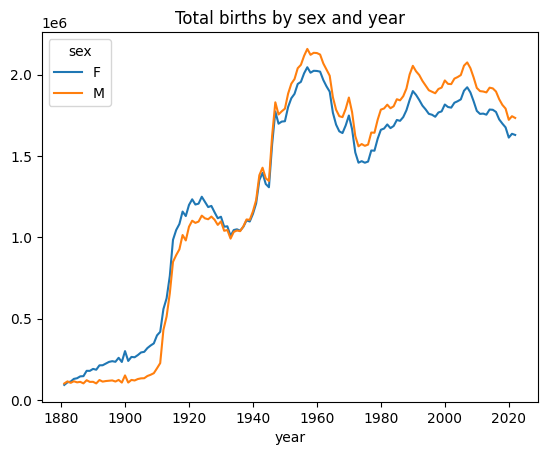

In [98]:
# Plot a line plot
total_births.plot(title = 'Total births by sex and year');

# ***Our observation:***

1. More number of female births < 1930
2. More number of male births > 1950

Read this [interesting article](https://www.pewresearch.org/short-reads/2022/08/31/global-population-skews-male-but-un-projects-parity-between-sexes-by-2050/) about ***global population***

In [101]:
# Calculate fraction of babies given each name relative to the total number of births
def add_prop(group):
    group["prop"] = group["num_births"] / group["num_births"].sum()
    return group

names = names.groupby(['year', 'sex'], group_keys=False).apply(add_prop)

In [102]:
# Display names DataFrame
names

,name,sex,num_births,year,prop
0,Mary,F,6919,1881,0.075245
1,Anna,F,2698,1881,0.029341
2,Emma,F,2034,1881,0.02212
3,Elizabeth,F,1852,1881,0.020141
4,Margaret,F,1658,1881,0.018031
...,...,...,...,...,...
2083153,Zuberi,M,5,2022,0.000003
2083154,Zydn,M,5,2022,0.000003
2083155,Zylon,M,5,2022,0.000003
2083156,Zymeer,M,5,2022,0.000003


In [103]:
# Perform sanity check to ensure the prop column sums to 1 within all the groups
names.groupby(['year', 'sex'])['prop'].sum()

year  sex
1881  F      1.0
      M      1.0
1882  F      1.0
      M      1.0
1883  F      1.0
            ... 
2020  M      1.0
2021  F      1.0
      M      1.0
2022  F      1.0
      M      1.0
Name: prop, Length: 284, dtype: object

In [104]:
# Extract the top 1,000 names for each sex/year combination
def get_top1000(group):
    return group.sort_values("num_births", ascending=False)[:1000]

# Create intermediate file
grouped = names.groupby(['year', 'sex'])

# Get top 1000 data
top1k = grouped.apply(get_top1000)

# Display top1K content
top1k

name sex num_births  year      prop
year sex                                                  
1881 F   0             Mary   F       6919  1881  0.075245
         1             Anna   F       2698  1881  0.029341
         2             Emma   F       2034  1881   0.02212
         3        Elizabeth   F       1852  1881  0.020141
         4         Margaret   F       1658  1881  0.018031
...                     ...  ..        ...   ...       ...
2022 M   2069897     Atharv   M        223  2022  0.000129
         2069898      Imran   M        223  2022  0.000129
         2069896     Asaiah   M        223  2022  0.000129
         2069901      Kalel   M        222  2022  0.000128
         2069902     London   M        222  2022  0.000128

[283934 rows x 5 columns]

In [106]:
# Drop the group index
top1k = top1k.reset_index(drop=True)
top1k

,name,sex,num_births,year,prop
0,Mary,F,6919,1881,0.075245
1,Anna,F,2698,1881,0.029341
2,Emma,F,2034,1881,0.02212
3,Elizabeth,F,1852,1881,0.020141
4,Margaret,F,1658,1881,0.018031
...,...,...,...,...,...
283929,Atharv,M,223,2022,0.000129
283930,Imran,M,223,2022,0.000129
283931,Asaiah,M,223,2022,0.000129
283932,Kalel,M,222,2022,0.000128


### **Analyzing Naming Trends**

In [107]:
# split the top one thousand names into the boy and girl portions
boys = top1k[top1k['sex']=='M']
girls = top1k[top1k['sex']=='F']

In [109]:
# form a pivot table of the total number of births by year and name
total_births = top1k.pivot_table('num_births', index='year', columns='name', aggfunc = sum)
total_births

name,Aaden,Aadhya,Aaliyah,Aanya,Aarav,Aarna,Aaron,Aarush,Aarya,Aayan,...,Zola,Zollie,Zona,Zora,Zoya,Zula,Zuri,Zyair,Zyaire,Zyon
year,,,,,,,,,,,,,,,,,,,,,
1881,NaN,NaN,NaN,NaN,NaN,NaN,94.0,NaN,NaN,NaN,...,10.0,NaN,9.0,21.0,NaN,27.0,NaN,NaN,NaN,NaN
1882,NaN,NaN,NaN,NaN,NaN,NaN,85.0,NaN,NaN,NaN,...,9.0,NaN,17.0,32.0,NaN,21.0,NaN,NaN,NaN,NaN
1883,NaN,NaN,NaN,NaN,NaN,NaN,105.0,NaN,NaN,NaN,...,10.0,NaN,11.0,35.0,NaN,25.0,NaN,NaN,NaN,NaN
1884,NaN,NaN,NaN,NaN,NaN,NaN,97.0,NaN,NaN,NaN,...,14.0,6.0,8.0,58.0,NaN,27.0,NaN,NaN,NaN,NaN
1885,NaN,NaN,NaN,NaN,NaN,NaN,88.0,NaN,NaN,NaN,...,12.0,6.0,14.0,48.0,NaN,38.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018,NaN,NaN,3836.0,NaN,488.0,NaN,5986.0,NaN,NaN,NaN,...,277.0,NaN,NaN,269.0,NaN,NaN,1131.0,NaN,323.0,NaN
2019,NaN,NaN,3661.0,NaN,419.0,NaN,5534.0,NaN,NaN,209.0,...,266.0,NaN,NaN,353.0,NaN,NaN,1181.0,NaN,540.0,213.0
2020,NaN,NaN,3572.0,NaN,418.0,NaN,5087.0,NaN,256.0,NaN,...,274.0,NaN,NaN,308.0,282.0,NaN,1264.0,225.0,668.0,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 142 entries, 1881 to 2022
Columns: 7283 entries, Aaden to Zyon
dtypes: float64(7283)
memory usage: 7.9 MB


array([<Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>, <Axes: xlabel='year'>,
       <Axes: xlabel='year'>], dtype=object)

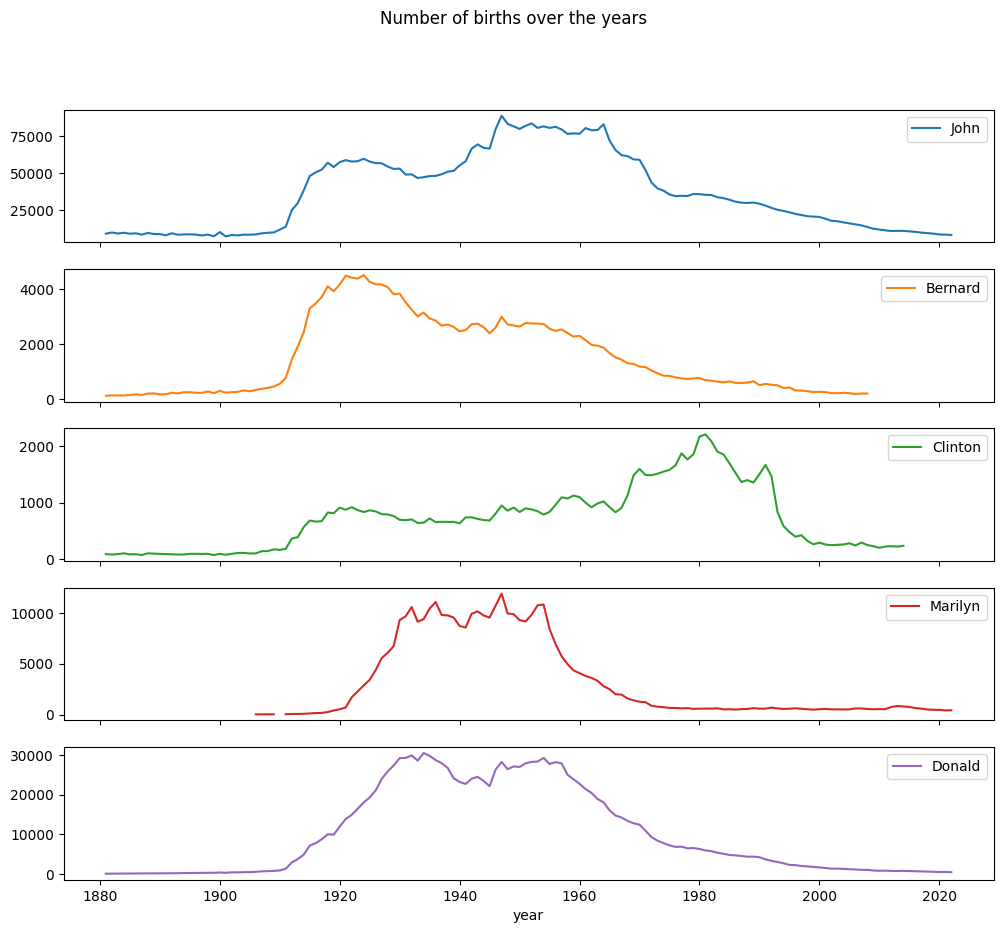

In [112]:
# Get total births info
total_births.info()

# Subset of names
subset = total_births[['John', 'Bernard', 'Clinton', 'Marilyn', 'Donald']]

# Plot line plot
subset.plot(subplots = True, figsize = (12, 10), title = 'Number of births over the years')

# ***Our observation:***

We might conclude that these names have grown out of favor with the American population. **But is that right?**

# **Measuring the increase in naming diversity**

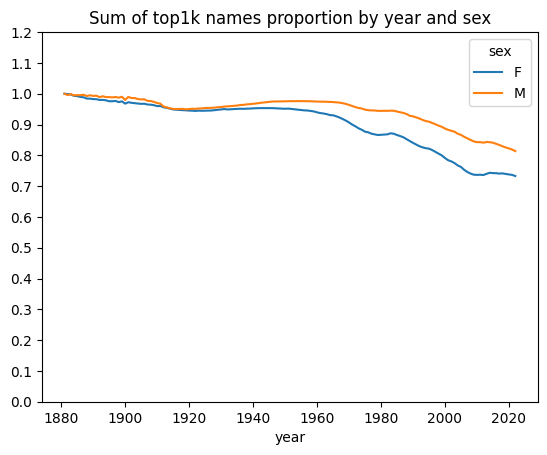

In [115]:
# Extract proportion of births represented by the top 1,000 most popular names
# aggregate year and sex
tab = top1k.pivot_table('prop', index='year',
                        columns = 'sex', aggfunc = sum)
# Line plot by year and sex
tab.plot(title = 'Sum of top1k names proportion by year and sex',
         yticks = np.linspace(0, 1.2, 13));

# ***The true explanation:***

there appears to be increasing name diversity (decreasing total proportion in the top one thousand).
* as parents become more educated, more diverse names created
* hence, the top1k name proportion decreases

# ***Boy names that became girl names (and vice versa)***

1. Another fun trend is looking at names that were **more popular with one gender earlier in the sample** but have b**ecome preferred as a name for the other gender over time**.
2. One example is the name **Lesley or Leslie**.

In [120]:
# Extract unique names from top1000
all_names = pd.Series(top1k['name'].unique())

# Extract unique names contain "Lesl"
lesley_like = all_names[all_names.str.contains('Lesl')]

# Display lesley_like content
lesley_like

# Extract just lesley_like names from top1k data
filtered = top1k[top1k['name'].isin(lesley_like)]

# Compute sum births grouped by name to see their relative frequencies
filtered.groupby('name')['num_births'].sum()

# aggregate by sex and year, and normalize within year
# pivot_table -> to get summarise information based on your specific criteria
tab = filtered.pivot_table('num_births', index='year',
                           columns='sex', aggfunc=sum)

# Display table content
tab

# Normalize within year
tab = tab.div(tab.sum(axis=1), axis = 'index')
tab

sex,F,M
year,,
1881,0.106796,0.893204
1882,0.065693,0.934307
1883,0.053030,0.946970
1884,0.107143,0.892857
1885,0.075758,0.924242
...,...,...
2018,1.000000,NaN
2019,1.000000,NaN
2020,1.000000,NaN


Text(0.5, 1.0, 'Proportion of "Lesi__" breakdown by year and sex')

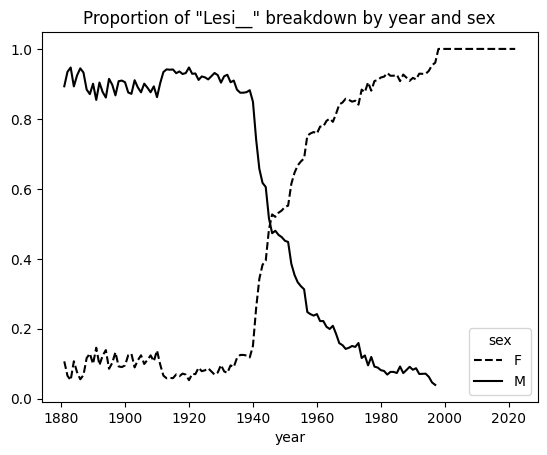

In [122]:
# line plot breakdown by sex over time for "Lesl__"
ax = tab.plot(style = {'M':'k-', 'F':'k--'})
ax.set_title('Proportion of "Lesi__" breakdown by year and sex')

# Thank you for hanging there with me **since 2023-10-22**

# I hope you've gained valuable knowledge during this time!

# I'll see you all when I see you all :)

# **Best of luck on your final exam!**